In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Laden des Datensatzes

In [214]:
df = np.loadtxt("oregon_housing_prices.txt",dtype=np.float64,delimiter=",")
data_x = df[:,0:1]*0.3048**2 #Feet to m^2
data_y = df[:,-1]

# Aufgabe 1

#### a) Visualisierung

Visualisieren Sie die Daten, indem Sie ein Streudiagramm in matplotlib zeichnen. Versehen Sie das Diagramm mit Achsenbeschriftungen und mit einem Titel

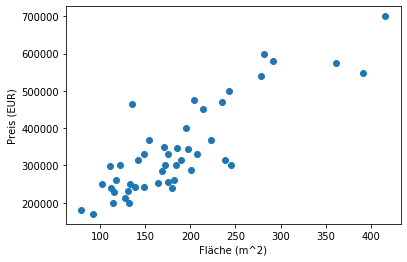

In [215]:
#TODO
plt.scatter(data_x, data_y)
plt.xlabel("Fläche (m^2)")
plt.ylabel("Preis (EUR)")
plt.show()

#### b) Lineare Regression mit scikit-learn

Trainieren Sie auf dem gesamten Datensatz ein lineares Regressionsmodell in scikit-learn.

In [216]:
#TODO
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg = reg.fit(data_x, data_y)

#### c) Modell-Output

Welche Werte haben die gefitteten Parameter $\theta_0$ und $\theta_1$?

In [217]:
#TODO
print(reg.coef_, reg.intercept_)


[1448.0181458] 71270.49244872917


#### d) Visualisierung des Modells

Erstellen Sie das Streudiagramm aus a) neu und zeichnen Sie nun auch die Regressionsgerade mit ein.

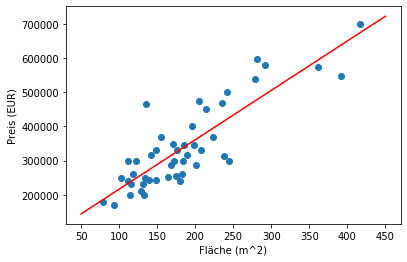

In [218]:
#TODO
x = np.linspace(50,450,100)
plt.scatter(data_x, data_y)
plt.xlabel("Fläche (m^2)")
plt.ylabel("Preis (EUR)")
plt.plot(x, reg.coef_*x+reg.intercept_, '-r')
plt.show()

#### e) Einsatz des Modells zur Prognose

Welchen Hauspreis prognostiziert das Modell für ein Haus mit $100m^2$ Wohnfläche?

In [219]:
#TODO
reg.predict([[100]])

array([216072.30702901])

# Aufgabe 2: Lineare Regression durch Lösen der Normalgleichungen

#### a) Aufstellen der Matrix

Stellen Sie die Matrix $X$ (s. Folien) auf. Legen Sie dazu eine neue Matrix der Dimension $(m,2)$ an, die aus lauter 1en besteht und kopieren Sie data_x in die zweite Spalte

In [220]:
#TODO
X = np.ones((data_x.shape[0],2))
X[:,1] = data_x[:,0]
print(X.shape)
print(X)

(47, 2)
[[  1.         195.46799616]
 [  1.         148.644864  ]
 [  1.         222.967296  ]
 [  1.         131.55070464]
 [  1.         278.70912   ]
 [  1.         184.4125344 ]
 [  1.         142.51326336]
 [  1.         132.57263808]
 [  1.         128.2061952 ]
 [  1.         138.79714176]
 [  1.         180.2318976 ]
 [  1.         185.80608   ]
 [  1.         175.5867456 ]
 [  1.         416.01981312]
 [  1.         117.80105472]
 [  1.         213.676992  ]
 [  1.         122.6320128 ]
 [  1.         114.82815744]
 [  1.         242.38403136]
 [  1.         281.58911424]
 [  1.         164.15967168]
 [  1.         175.40093952]
 [  1.         149.01647616]
 [  1.         182.27576448]
 [  1.         361.3928256 ]
 [  1.         102.193344  ]
 [  1.         135.45263232]
 [  1.         234.67307904]
 [  1.         204.386688  ]
 [  1.         244.98531648]
 [  1.         170.84869056]
 [  1.          92.90304   ]
 [  1.         189.5222016 ]
 [  1.         291.43683648]
 [  1.

#### b) Aufstellen und Lösen der Normalgleichungen

Berechnen Sie $\theta_0$ und $\theta_1$ durch Lösen der Normalgleichungen. Hinweis: das Matrix-Matrix-Produkt $A\cdot B$   wird in numpy durch den Aufruf $A$@$B$ oder durch Aufruf der Funktion np.dot($A$,$B$) gebildet. Zum Lösen eines linearen Gleichungssystems kann die Funktion numpy.linalg.solve verwendet werden

In [221]:
#TODO
Xt = X.transpose()
inverted = np.linalg.inv(Xt@X)
O = inverted@Xt@data_y
print(O)


[71270.49244873  1448.0181458 ]


# Aufgabe 3: Gradientenverfahren

In dieser Aufgabe soll die Regressionsaufgabe mit Hilfe des Gradientenverfahrens gelöst werden, das zu implementieren ist.

#### a) Standardisierung

Erstellen Sie zwei numpy-Arrays data_x_std und data_y_std, die durch Standardisierung aus data_x bzw. data_y hervorgehen. Welchen Wert erwarten Sie für $\theta_0$, wenn ein univariates lineares Regressionsmodell auf den standardisierten Daten trainiert wird? Bilden Sie anschließend wieder die Matrix $X$ (s. Folien), indem Sie eine führende Spalte mit 1en zu data_x_std hinzufügen.

In [222]:
#TODO
from sklearn import preprocessing

sc_x = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()

data_x_std = sc_x.fit_transform(data_x)
data_y_std = sc_y.fit_transform(data_y.reshape(-1,1))
data_y_std = data_y_std.flatten()

X_std = np.ones((data_x_std.shape[0],2))
X_std[:,1] = data_x_std[:,0]

Xt_std = X_std.transpose()
inverted_std = np.linalg.inv(Xt_std@X_std)
O_std = inverted_std@Xt_std@data_y_std

print(O_std)

[-4.02455846e-16  8.54987593e-01]


In [444]:
mean_x = sum(data_x)/len(data_x)
s_x = (1/len(data_x)*sum([(x - mean_x)**2 for x in data_x]))**0.5
data_x_std = (data_x - mean_x)/s_x

mean_y = sum(data_y)/len(data_y)
s_y = (1/len(data_y)*sum([(y - mean_y)**2 for y in data_y]))**0.5
data_y_std = (data_y - mean_y)/s_y

print()
#print(data_y)
#print(data_y_std)

In [445]:
X_std = np.ones((data_x_std.shape[0],2))
X_std[:,1] = data_x_std[:,0]

Xt_std = X_std.transpose()
inverted_std = np.linalg.inv(Xt_std@X_std)
O_std = inverted_std@Xt_std@data_y_std

[[0.85498759]] [-4.46588076e-16]


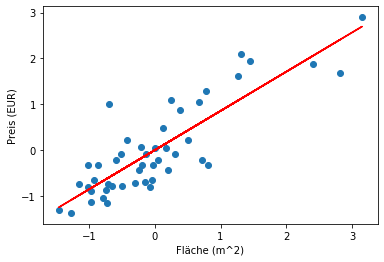

In [446]:
reg = LinearRegression()
reg = reg.fit(data_x_std, data_y_std.reshape(-1,1))

print(reg.coef_, reg.intercept_)

x = np.linspace(-2,3,1)
plt.scatter(data_x_std, data_y_std)
plt.xlabel("Fläche (m^2)")
plt.ylabel("Preis (EUR)")
plt.plot(data_x_std, reg.coef_*data_x_std+reg.intercept_, '-r')
plt.show()

#### b) Least Squares - Kostenfunktional

Vervollständigen Sie die folgende Funktion, die das Least-Squares-Kostenfunktional $J$ realisiert.

In [454]:
def cost(X, Y, theta):
    """
    This function implements the least squares cost function for univariate linear regression
    Parameters:
        X: m x 2 matrix containing 1s in the first column and the x values of the training samples in the second column
        Y: m x 1 matrix containing the target values of the training samples
        theta: 2 x 1 parameters of the cost function
        
    Returns: 
        value of cost function for a given theta
        
    """
    m = X.shape[0]
    J = (1/(2*m))*((X@theta-Y).transpose())@(X@theta-Y)
    return J
    #TODO

In [455]:
#print(cost(X_std, data_y_std, [-4.13517603e-16, 0.85498759]))
print(cost(X_std, data_y_std, [0.85498759, -4.13517603e-16]))
#print(cost(X, data_y, [1448.0181458,71270.49244873]))
print(cost(X, data_y, [71270.49244873,1448.0181458]))

0.8655018895270046
2058132740.4330418


#### c) Gradientenverfahren

Implementieren Sie die folgende Funktion, die das Gradientenverfahren realisiert. Die Iteration soll abbrechen, wenn $\|update\|<1e-5$ gilt, oder wenn max_iter Iterationen durchgeführt wurden.

In [449]:

def gradientDescent(X, Y, theta, max_iter, alpha):
    """
    This function implements gradient descent for univariate linear regression.
    Parameters:
        X: m x 2 matrix containing 1 in the first column and the x values in the second column
        Y: m x 1 matrix containing the target values 
        theta: initial value for theta
        max_iter: max number of iterations to be carried out
        alpha: step size
    Returns: mx1 matrix containing the regression parameters resulting from the iteration
    """
    m = X.shape[0]
    for i in range(max_iter): 
        thetaNew = theta - ((alpha/m) * (X.transpose()@X@theta - X.transpose()@Y))
        thetaNew = thetaNew[0]


        thetaNew = thetaNew.reshape(-1,1)
        delta = 0
        for t1, t2 in zip(theta, thetaNew):
            delta1 = t1 - t2
            if delta1 < 0:
                delta1 *= -1
            delta += delta1
        if delta < 1e-5:
            return thetaNew
        else:
            theta = thetaNew
        
    return theta
    #TODO

#### d) Anwendung auf den standardisierten Häuserdatensatz

Wenden Sie das Gradientenverfahren auf den standardisierten Häuserdatensatz an, um die Koeffizienten $\theta_0$ und $\theta_1$ zu bestimmen. Verwenden Sie als Startwert den Nullvektor und die Parameter max_iter=50 sowie alpha=1.0

In [450]:
#TODO
theta0 = [[0],[0]]
gradientDescent(X_std, data_y_std,theta0, 50, 1.0)


array([[-4.46588076e-16],
       [ 8.54987593e-01]])

In [451]:
theta0 = [[0],[0]]
theta1 = [[1],[1]]

[0.85498759] -4.1351760307921594e-16




TypeError: unsupported operand type(s) for -: 'list' and 'float'

#### e)  

Verwenden Sie das resultierende Modell, um den prognostizierten Preis für ein Haus mit $100m^2$ zu bestimmen. Transformieren Sie die Daten geeignet. Es sollte derselbe Zahlenwert wie bei Aufgabe 1e herauskommen (ca. 216.000 Euro).

In [452]:
#TODO
coeff = gradientDescent(X_std, data_y_std,theta0, 50, 1.0)

print("1:",coeff[0])
print("2:",coeff[1])

a = (100-mean_x)/s_x
print("fläche",a)
price = coeff[1] * a + coeff[0]
print("PRICE",price)
price_S = (price*s_y) + mean_y
print(s_y)
print(mean_y)

print(price_s)


1: [-4.46588076e-16]
2: [0.85498759]
fläche [-1.17563817]
PRICE [-1.00515605]
123702.53600614739
340412.6595744681
[446176.79306728]


In [ ]:
reg.coef_*data_x_std+reg.intercept_,
print(reg.coef_, reg.intercept_)
[[0.85498759]] [-4.46588076e-16]